# Latent Dirichlet Allocation - Variational Bayes methods

In [3]:
# ok we're gonna try using the custom py file that i made LMAOOOO
# i hope it doesnt crash
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lda_utils import get_docs, LDA, parse_docs

In [4]:
df = pd.read_csv("bbc-news-data.csv", sep="\t")
np.unique(df.category)

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [5]:
# step 1: get the vocabulary and word id/count lists
vocab, word_ids, word_cts = get_docs()

In [6]:
len(vocab)

28913

In [7]:
# step 2: define parameters
# here I'm just using the default parameters that seem to work well for other people
n_topics = 5
alpha = 0.1
eta = 0.1
learning_offset = 10
kappa = 0.7
maxiters = 100
thres = 1e-3

n_epochs = 2

In [8]:
# step 3: split into train, test
np.random.seed(np.sum([ord(c) for c in "UCI CS 275P LDA"]))
split = 0.9
train_idx = np.random.permutation(np.arange(len(word_ids)))[:int(split*len(word_ids))]

train_word_ids = []
train_word_cts = []
test_word_ids = []
test_word_cts = []
for idx in range(len(word_ids)):
    if idx in train_idx:
        train_word_ids.append(word_ids[idx])
        train_word_cts.append(word_cts[idx])
    else:
        test_word_ids.append(word_ids[idx])
        test_word_cts.append(word_cts[idx])

In [9]:
# step 4: LDA class instance
model = LDA(vocab, n_topics, len(train_word_ids), alpha, eta, learning_offset, kappa, maxiters, thres)

In [10]:
# making a new folder to store lambdas
cwd = os.getcwd()
lambdas_path = f'{cwd}/lambdas/'
if os.path.exists(lambdas_path):
    for root, _, files in os.walk(lambdas_path, topdown=False):
        for name in files:
            os.remove(os.path.join(root, name))
        os.rmdir(root)

os.mkdir(lambdas_path)

In [11]:
# step 5: batch data and train
# for bbc news data, there are 2225 articles
# with the seed defined above and an 80% split, there are 1780 articles in train
# we can try 178 batches of size 10?
# for a 90% split, there are 2002 documents
n_train = len(train_word_ids)
batch_size = 50
n_batches = int(np.ceil(n_train / batch_size))

# train
verbose = True

# remember group evolution
n_largest = 10
group_evolution = np.empty((n_batches*n_epochs, n_topics, 10), dtype='U100')

np.random.seed(np.sum([ord(c) for c in "UCI CS 275P LDA"]))

for epoch in range(n_epochs):
    # shuffle the batch
    shuffle = np.random.permutation(train_idx)
    train_word_ids = [word_ids[j] for j in shuffle]
    train_word_cts = [word_cts[j] for j in shuffle]
    for i in range(n_batches):
        # save the group evolution
        for k in range(n_topics):
            top_n = np.argpartition(model._expElogbeta[k], -n_largest)[-n_largest:]
            group_evolution[epoch*n_batches + i,k] = np.array([list(vocab.keys())[i] for i in top_n], dtype='U100')

        # index the words
        start = i*batch_size
        end = min(len(train_word_ids), (i+1)*batch_size)
        batch_ids = train_word_ids[start:end]
        batch_cts = train_word_cts[start:end]

        gamma, bound = model.update_lambda(batch_ids, batch_cts)
        np.savetxt(f'{lambdas_path}lambda_{epoch}_{i:03}.txt', model._lambda.T)
        if verbose:
            print(f"epoch[{epoch+1}/{n_epochs}] - batch [{i+1:3}/{n_batches}] - NLL={-bound}")
        

epoch[1/2] - batch [  1/41] - NLL=4476631.881339816
epoch[1/2] - batch [  2/41] - NLL=4352955.383628982
epoch[1/2] - batch [  3/41] - NLL=3775118.1676843846
epoch[1/2] - batch [  4/41] - NLL=4285149.20075738
epoch[1/2] - batch [  5/41] - NLL=4087412.184819961
epoch[1/2] - batch [  6/41] - NLL=4205661.055338493
epoch[1/2] - batch [  7/41] - NLL=4219793.514081275
epoch[1/2] - batch [  8/41] - NLL=3810857.063095509
epoch[1/2] - batch [  9/41] - NLL=3792649.853037477
epoch[1/2] - batch [ 10/41] - NLL=3799285.0301898615
epoch[1/2] - batch [ 11/41] - NLL=4668290.620943745
epoch[1/2] - batch [ 12/41] - NLL=3734391.415852889
epoch[1/2] - batch [ 13/41] - NLL=4112233.445892228
epoch[1/2] - batch [ 14/41] - NLL=4776022.515475217
epoch[1/2] - batch [ 15/41] - NLL=4242868.320970874
epoch[1/2] - batch [ 16/41] - NLL=4090169.515927693
epoch[1/2] - batch [ 17/41] - NLL=4106041.8595626643
epoch[1/2] - batch [ 18/41] - NLL=3907053.083268461
epoch[1/2] - batch [ 19/41] - NLL=3606766.1827460527
epoch[1/2

In [ ]:
print("INIT")
for k in range(n_topics):
    print(f"Topic {k+1}:")
    for i in range(10):
        print(f"{group_evolution[0, k, i]}")
print()
print("EPOCH 1")
for k in range(n_topics):
    print(f"Topic {k+1}:")
    for i in range(10):
        print(f"{group_evolution[n_batches, k, i]}")
print()
print("EPOCH 2")
for topic in range(n_topics):
    top_n = np.argpartition(model._expElogbeta[topic], -n_largest)[-n_largest:]
    out = ""
    for i in top_n:
        out += list(vocab.keys())[i] + "\n"


Initial topic 1: ['hostway' 'rushed' 'sorrells' 'exceed' 'marchionne' 'preventative'
 'trifling' 'addsince' 'ceo' 'knighting']
Initial topic 2: ['randell' 'vaile' 'firm' 'refunds' 'patois' 'rise' 'spurring' 'cosiness'
 'theriault' 'thrills']
Initial topic 3: ['pendleton' 'yh' 'bruckheimer' 'ii' 'benn' 'prettejohn' 'backside'
 'priceless' 'cullen' 'te']
Initial topic 4: ['neglected' 'impresario' 'kinds' 'enjoying' 'godzilla' 'scabbers' 'obese'
 'ofsquabbling' 'rd' 'appointed']
Initial topic 5: ['simpler' 'kathy' 'ended' 'monica' 'common' 'understands' 'heralded'
 'misrepresented' 'berhanu' 'eraa']

1 epoch, topic 1: ['england' 'year' 'good' 'two' 'last' 'win' 'back' 'time' 'game' 'first']
1 epoch, topic 2: ['world' 'company' 'sales' 'year' 'market' 'years' 'new' 'last' 'us'
 'growth']
1 epoch, topic 3: ['years' 'number' 'starring' 'awards' 'star' 'oceans' 'award' 'sequel'
 'film' 'best']
1 epoch, topic 4: ['spokesman' 'party' 'blair' 'home' 'people' 'government' 'public'
 'election' 'la

In [13]:
# recover expected betas
n_largest = 10
for topic in range(n_topics):
    top_n = np.argpartition(model._expElogbeta[topic], -n_largest)[-n_largest:]
    print(f"top {n_largest} words from topic {topic+1}: {[list(vocab.keys())[i] for i in top_n]}")

top 10 words from topic 1: ['world', 'england', 'back', 'win', 'year', 'time', 'match', 'game', 'first', 'two']
top 10 words from topic 2: ['economy', 'years', 'sales', 'year', 'company', 'new', 'growth', 'last', 'us', 'market']
top 10 words from topic 3: ['films', 'show', 'number', 'star', 'music', 'awards', 'award', 'years', 'film', 'best']
top 10 words from topic 4: ['minister', 'government', 'election', 'party', 'say', 'people', 'blair', 'new', 'labour', 'public']
top 10 words from topic 5: ['tv', 'many', 'games', 'technology', 'mobile', 'music', 'digital', 'users', 'people', 'new']


In [14]:
# for formatting later
for topic in range(n_topics):
    top_n = np.argpartition(model._expElogbeta[topic], -n_largest)[-n_largest:]
    out = ""
    for i in top_n:
        out += list(vocab.keys())[i] + "\n"

    print(out)
    print()

world
england
back
win
year
time
match
game
first
two


economy
years
sales
year
company
new
growth
last
us
market


films
show
number
star
music
awards
award
years
film
best


minister
government
election
party
say
people
blair
new
labour
public


tv
many
games
technology
mobile
music
digital
users
people
new




In [14]:
# read an article
import pandas as pd
df = pd.read_csv("bbc-news-data.csv", sep="\t")

article_idx = 0
article = df.iloc[article_idx].content
print(article)

# make a prediction
topics = model.get_topics_for_article(article)[0]
topics = topics / np.sum(topics)
print(topics)

 Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-spe

In [15]:
# compute perplexity of model
# alpha, eta, perplexity
# 0.1, 0.01, 14906237
# 0.1, 0.10, 184630
# 0.1, 0.50, 137403
# 0.5, 0.10, 165868
model.perplexity_holdout(test_word_ids, test_word_cts)

144608.19235747983

In [13]:
# try different K values and compute perplexity for each
n_topics_to_try = [3, 5, 7, 10, 13, 15, 17, 20]
perplexities = []

n_train = len(train_word_ids)
batch_size = 20
n_batches = int(np.ceil(n_train / batch_size))

np.random.seed(np.sum([ord(c) for c in "UCI CS 275P Perplexities"]))

for K in n_topics_to_try:
    print(f"Training model with K={K}...")
    # define the model
    model = LDA(vocab, K, len(train_word_ids), alpha, eta, learning_offset, kappa, maxiters, thres)

    # train
    for epoch in range(n_epochs):
        # shuffle the batch
        shuffle = np.random.permutation(train_idx)
        train_word_ids = [word_ids[j] for j in shuffle]
        train_word_cts = [word_cts[j] for j in shuffle]
        for i in range(n_batches):
            start = i*batch_size
            end = min(len(train_word_ids), (i+1)*batch_size)
            batch_ids = train_word_ids[start:end]
            batch_cts = train_word_cts[start:end]

            gamma, bound = model.update_lambda(batch_ids, batch_cts)

    # get perplexity and append to the list
    # compute 5 perplexities and append the median
    perps = []
    for i in range(5):
        perps.append(model.perplexity_holdout(test_word_ids, test_word_cts))
    perplexities.append(np.max(perps))

Training model with K=3...
Training model with K=5...
Training model with K=7...
Training model with K=10...
Training model with K=13...
Training model with K=15...
Training model with K=17...
Training model with K=20...


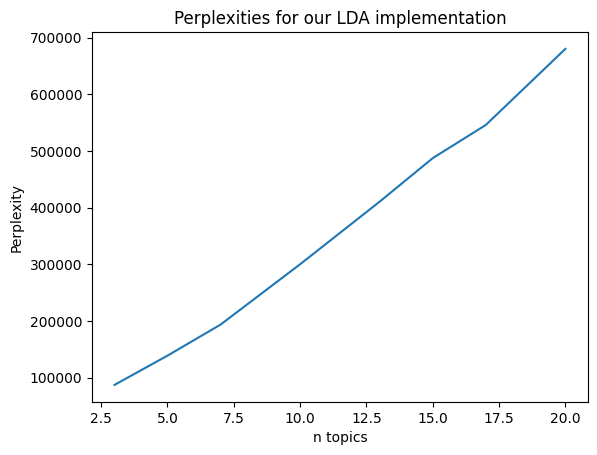

In [14]:
plt.plot(n_topics_to_try, perplexities)
plt.title("Perplexities for our LDA implementation")
plt.xlabel("n topics")
plt.ylabel("Perplexity")
plt.show()

In [15]:
perplexities

[87077.75715506618,
 138741.37852407037,
 193527.6835420943,
 300025.7707614805,
 410541.63521041244,
 487306.0197644807,
 545841.7809537646,
 680039.6719113739]

# Comparison to sklearn LDA

In [16]:
# i want to compare it to the scikit-learn LDA implementation
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# get & transform data
df = pd.read_csv("bbc-news-data.csv", sep='\t')
train_docs = df.iloc[train_idx].content.tolist()

tokenizer = RegexpTokenizer(r'\w+')

tfidf = TfidfVectorizer(lowercase=True, 
                        vocabulary=vocab.keys(), 
                        ngram_range=(1,1), 
                        tokenizer=tokenizer.tokenize)

train_data = tfidf.fit_transform(train_docs)

n_components=5

model = LatentDirichletAllocation(n_components=n_components,
                                  doc_topic_prior=alpha, 
                                  topic_word_prior=eta,
                                  learning_decay=kappa,
                                  learning_offset=learning_offset,
                                  batch_size=batch_size,
                                  max_iter=n_epochs,
                                  max_doc_update_iter=maxiters,
                                  mean_change_tol=thres)

# fit & transform model on data
np.random.seed(np.sum([ord(c) for c in "UCI CS 275P sklearn train"]))

lda_matrix = model.fit_transform(train_data)
lda_components = model.components_

C:\Users\timot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [18]:
terms = tfidf.get_feature_names_out()

for idx, comp in enumerate(lda_components):
    zipped = zip(terms, comp)
    top_terms_key = sorted(zipped, key=lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print(f"Topic {idx}: {top_terms_list}")
    

Topic 0: ['film', 'year', 'best', 'world', 'game', 'us', 'two']
Topic 1: ['people', 'year', 'us', 'new', 'labour', 'brown', 'search']
Topic 2: ['best', 'year', 'england', 'film', 'people', 'game', 'us']
Topic 3: ['us', 'year', 'government', 'people', 'yukos', 'oil', 'new']
Topic 4: ['year', 'new', 'us', 'people', 'uk', 'government', 'first']


In [19]:
test_idx = [i for i in range(len(word_ids)) if i not in train_idx]
test_docs = df.iloc[train_idx].content.tolist()
test_data = tfidf.fit_transform(test_docs)

model.perplexity(test_data)

189994.72404718827

In [20]:
# test perplexities for different topic counts
n_topics_to_try = [3, 5, 7, 10, 13, 15, 17, 20]
perplexities = []

np.random.seed(np.sum([ord(c) for c in "UCI CS 275P sklearn"]))

for K in n_topics_to_try:
    print(f"Training model with K={K}...")
    # define the model
    model = LatentDirichletAllocation(n_components=K,
                                  doc_topic_prior=alpha, 
                                  topic_word_prior=eta,
                                  learning_decay=kappa,
                                  learning_offset=learning_offset,
                                  batch_size=batch_size,
                                  max_iter=n_epochs,
                                  max_doc_update_iter=maxiters,
                                  mean_change_tol=thres)

    # train
    lda_matrix = model.fit_transform(train_data)

    # compute 5 perplexities and append the median
    perps = []
    model.perplexity(test_data)
    for i in range(5):
        perps.append(model.perplexity(test_data))
    perplexities.append(np.max(perps))

Training model with K=3...
Training model with K=5...
Training model with K=7...
Training model with K=10...
Training model with K=13...
Training model with K=15...
Training model with K=17...
Training model with K=20...


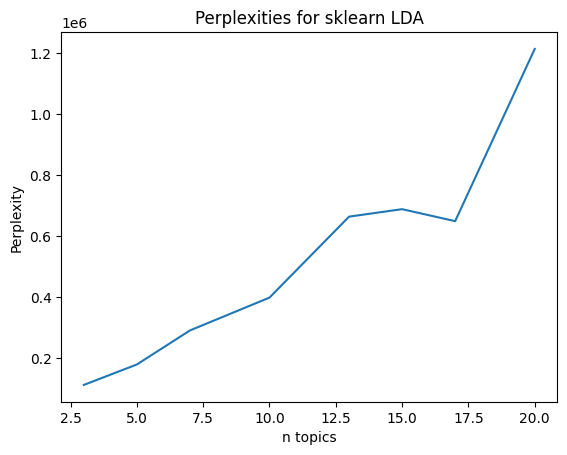

In [21]:
plt.plot(n_topics_to_try, perplexities)
plt.title("Perplexities for sklearn LDA")
plt.xlabel("n topics")
plt.ylabel("Perplexity")
plt.show()

In [22]:
perplexities

[110983.48002542995,
 178113.17233687796,
 289846.40999186307,
 397707.29561889934,
 663607.3602781153,
 688100.6299740911,
 648743.1707357329,
 1214339.0002362658]